# WeatherPy


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls



In [4]:
#create df
cities_df=pd.DataFrame(cities)
cities_df

,0
0,bengkulu
1,ushuaia
2,ilulissat
3,nowy dwor gdanski
4,tommot
...,...
626,olinda
627,staryy nadym
628,yerofey pavlovich
629,carnoustie


In [5]:
#create columns for new df, use "" as initial entry
cities_df['City']=cities
cities_df["Latitude"]=""
cities_df['Longitude']= ""
cities_df['ID'] = ""
cities_df['Temperature']= ""
cities_df['Humidity']= ""
cities_df['Cloudiness']= ""
cities_df['Wind Speed (mph)']= ""

#set city as the index
cities_df.set_index('City')
cities_df.head()

,0,City,Latitude,Longitude,ID,Temperature,Humidity,Cloudiness,Wind Speed (mph)
0,bengkulu,bengkulu,,,,,,,
1,ushuaia,ushuaia,,,,,,,
2,ilulissat,ilulissat,,,,,,,
3,nowy dwor gdanski,nowy dwor gdanski,,,,,,,
4,tommot,tommot,,,,,,,


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#use imperial to show temp in degrees F
units= "imperial"

#start city count off at 0
citycount= 0

query_url =f"{url}appid={weather_api_key}&units={units}&q="

#iterrate thru all the rows, add results to columns
for index, row in cities_df.iterrows():
    city=row['City']
    try:
        response =requests.get(query_url + city).json()
        cities_df.loc[index, "Latitude"] =response['coord']['lat']
        cities_df.loc[index, "Longitude"]=response['coord']['lon']
        cities_df.loc[index, "ID"] =response['id']
        cities_df.loc[index, "Temperature"] =response['main']['temp']
        cities_df.loc[index, "Humidity"] =response['main']['humidity']
        cities_df.loc[index, "Cloudiness"] =response['clouds']['all']
        cities_df.loc[index, "Wind Speed (mph)"]=response['wind']['speed']
                     
        print(f"Processing city: {citycount} city name: {city}")  
        
    #handle exceptions for city that isnt available
    except: 
        print("skip")
        pass
    citycount+=1

Processing city: 0 city name: bengkulu
Processing city: 1 city name: ushuaia
Processing city: 2 city name: ilulissat
Processing city: 3 city name: nowy dwor gdanski
Processing city: 4 city name: tommot
Processing city: 5 city name: airai
Processing city: 6 city name: vaini
Processing city: 7 city name: namibe
Processing city: 8 city name: mataura
Processing city: 9 city name: sharjah
Processing city: 10 city name: new norfolk
Processing city: 11 city name: narsaq
Processing city: 12 city name: salalah
Processing city: 13 city name: severo-kurilsk
Processing city: 14 city name: mount gambier
Processing city: 15 city name: busselton
skip
Processing city: 17 city name: taoudenni
Processing city: 18 city name: cabedelo
Processing city: 19 city name: shimoda
Processing city: 20 city name: bredasdorp
Processing city: 21 city name: capao bonito
skip
Processing city: 23 city name: suntar
Processing city: 24 city name: grindavik
Processing city: 25 city name: manado
Processing city: 26 city nam

Processing city: 214 city name: laguna
Processing city: 215 city name: babu
Processing city: 216 city name: dosso
Processing city: 217 city name: srednebelaya
Processing city: 218 city name: pevek
Processing city: 219 city name: teya
Processing city: 220 city name: dolores
skip
skip
Processing city: 223 city name: wasilla
Processing city: 224 city name: saint-augustin
Processing city: 225 city name: zhigansk
Processing city: 226 city name: saint george
Processing city: 227 city name: prince rupert
Processing city: 228 city name: roald
Processing city: 229 city name: beringovskiy
Processing city: 230 city name: sibut
Processing city: 231 city name: murgab
Processing city: 232 city name: antofagasta
Processing city: 233 city name: bundaberg
Processing city: 234 city name: nuuk
Processing city: 235 city name: vinh long
Processing city: 236 city name: duma
Processing city: 237 city name: ponta delgada
Processing city: 238 city name: sao filipe
Processing city: 239 city name: port pirie
Pro

Processing city: 429 city name: talnakh
Processing city: 430 city name: leningradskiy
Processing city: 431 city name: olavarria
Processing city: 432 city name: broken hill
Processing city: 433 city name: muisne
Processing city: 434 city name: manadhoo
Processing city: 435 city name: labuhan
Processing city: 436 city name: carquefou
Processing city: 437 city name: grand bank
Processing city: 438 city name: gonzaga
Processing city: 439 city name: rio gallegos
Processing city: 440 city name: mountain home
Processing city: 441 city name: aleksandrov gay
Processing city: 442 city name: hervey bay
Processing city: 443 city name: longyearbyen
Processing city: 444 city name: margate
Processing city: 445 city name: arraial do cabo
skip
Processing city: 447 city name: asfi
Processing city: 448 city name: basco
skip
Processing city: 450 city name: khandyga
Processing city: 451 city name: skibbereen
Processing city: 452 city name: shaunavon
skip
Processing city: 454 city name: poreba
Processing ci

### Convert Raw Data to DataFrame


In [39]:
#export city data to a csv
cities_df.to_csv("City_Data.csv")

In [40]:
cities_df.head(10)

,0,City,Latitude,Longitude,ID,Temperature,Humidity,Cloudiness,Wind Speed (mph)
0,bengkulu,bengkulu,-3.8004,102.266,1649150,83.66,64,49,6.98
1,ushuaia,ushuaia,-54.8,-68.3,3833367,41,93,75,9.22
2,ilulissat,ilulissat,69.2167,-51.1,3423146,28.4,69,17,3.44
3,nowy dwor gdanski,nowy dwor gdanski,54.2131,19.1177,3090502,40.42,75,20,16.11
4,tommot,tommot,58.9564,126.293,2015179,32.43,82,90,15.64
5,airai,airai,-8.9266,125.409,1651810,69.35,71,44,1.97
6,vaini,vaini,-21.2,-175.2,4032243,78.8,100,40,2.3
7,namibe,namibe,-15.1961,12.1522,3347019,80.35,74,48,1.36
8,mataura,mataura,-46.1927,168.864,6201424,52,94,100,3
9,sharjah,sharjah,25.3573,55.4033,292672,88.27,21,0,2.3


## Inspect the data and remove the cities where the humidity > 100%.
----


In [13]:
#show rows that have humidity==100
cities_df.loc[cities_df["Humidity"]== 100]

,0,City,Latitude,Longitude,ID,Temperature,Humidity,Cloudiness,Wind Speed (mph)
6,vaini,vaini,-21.2,-175.2,4032243,78.8,100,40,2.3
20,bredasdorp,bredasdorp,-34.5322,20.0403,1015776,53.6,100,3,8.05
78,sao jose de ribamar,sao jose de ribamar,-2.5619,-44.0542,3388441,77,100,0,4.61
162,cayenne,cayenne,4.9333,-52.3333,3382160,76.8,100,90,6.91
211,salvador,salvador,13.8333,-88.9167,3585968,76.24,100,20,3.44
307,voronovytsya,voronovytsya,49.1095,28.6808,689003,41,100,75,4.47
330,townsville,townsville,-19.25,146.8,2146142,69.8,100,75,5.75
348,coihaique,coihaique,-45.5752,-72.0662,3894426,37.4,100,20,2.3
439,rio gallegos,rio gallegos,-51.6226,-69.2181,3838859,42.8,100,40,2.3
568,gracac,gracac,44.3006,15.8547,3199790,48.65,100,20,1.14


In [14]:
#  Get the indices of cities that have humidity over 100%.
cities_df.index[cities_df["Humidity"]== 100].tolist()

[6, 20, 78, 162, 211, 307, 330, 348, 439, 568, 579, 580, 611]

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data= cities_df.drop(index= [6, 20, 78, 162, 211, 307, 330, 348, 439, 568, 579, 580, 611])
clean_city_data

,0,City,Latitude,Longitude,ID,Temperature,Humidity,Cloudiness,Wind Speed (mph)
0,bengkulu,bengkulu,-3.8004,102.266,1649150,83.66,64,49,6.98
1,ushuaia,ushuaia,-54.8,-68.3,3833367,41,93,75,9.22
2,ilulissat,ilulissat,69.2167,-51.1,3423146,28.4,69,17,3.44
3,nowy dwor gdanski,nowy dwor gdanski,54.2131,19.1177,3090502,40.42,75,20,16.11
4,tommot,tommot,58.9564,126.293,2015179,32.43,82,90,15.64
...,...,...,...,...,...,...,...,...,...
626,olinda,olinda,-8.0089,-34.8553,3393536,78.8,73,75,2.3
627,staryy nadym,staryy nadym,65.6118,72.6842,1490918,34.72,99,73,18.05
628,yerofey pavlovich,yerofey pavlovich,53.9667,121.967,2012938,39.78,23,30,8.25
629,carnoustie,carnoustie,56.5014,-2.7091,2653704,37.69,93,0,5.75


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [37]:
#use to_numeric() to make all the columns readable as numbers instead of strings
clean_city_data['Temperature']= pd.to_numeric(clean_city_data['Temperature'])
clean_city_data['Latitude']= pd.to_numeric(clean_city_data['Latitude'])
clean_city_data['Humidity']= pd.to_numeric(clean_city_data['Humidity'])
clean_city_data['Cloudiness']= pd.to_numeric(clean_city_data['Cloudiness'])
clean_city_data['Wind Speed (mph)']= pd.to_numeric(clean_city_data['Wind Speed (mph)'])

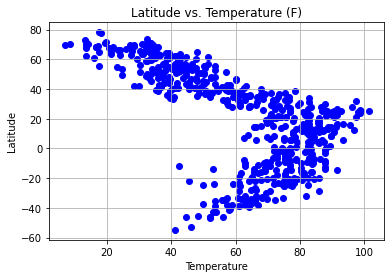

In [52]:
plt.scatter(clean_city_data['Temperature'], clean_city_data['Latitude'], marker='o', color= 'blue')
plt.grid()
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.title("Latitude vs. Temperature (F)")
plt.savefig("../output_data/temp_v_lat")
plt.show()

In [ ]:
# I made sure that the Latitude was on the y axis to make it more readable. The graph shows that the temperature 
# is hotter at the equator, and colder at the poles. 

## Latitude vs. Humidity Plot

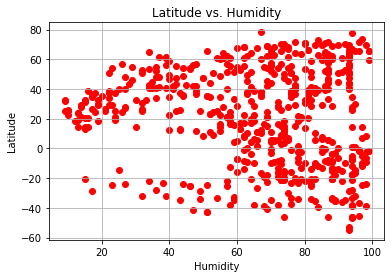

In [43]:
plt.scatter(clean_city_data['Humidity'], clean_city_data['Latitude'], marker='o', color= 'red')
plt.grid()
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Latitude vs. Humidity")
plt.savefig("../output_data/temp_v_humid")
plt.show()

In [ ]:
# This graph shows that most of the cities have high humidty, over 60% humidity. 

## Latitude vs. Cloudiness Plot

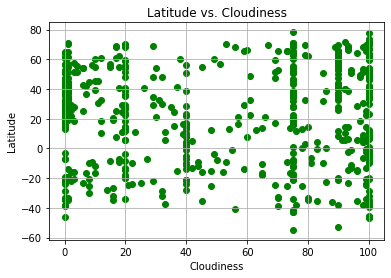

In [44]:
plt.scatter(clean_city_data['Cloudiness'], clean_city_data['Latitude'], marker='o', color= 'green')
plt.grid()
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Latitude vs. Cloudiness")
plt.savefig("../output_data/temp_v_cloud")
plt.show()

In [ ]:
# This graph is pretty varied, showing not a lot of correlation. It looks like cloduiness if often decribed by 
# specific numbers: 0%, 20%, 40%, 75%, 90%, and 100%. There doesnt't seem to be many points outside of those
# set of numbers. 

## Latitude vs. Wind Speed Plot

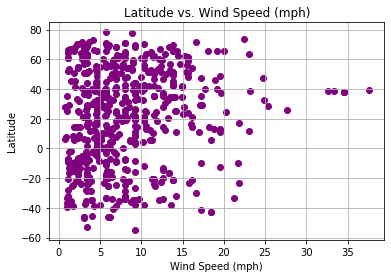

In [45]:
plt.scatter(clean_city_data['Wind Speed (mph)'], clean_city_data['Latitude'], marker='o', color= 'purple')
plt.grid()
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Latitude vs. Wind Speed (mph)")
plt.savefig("../output_data/temp_v_wind")
plt.show()

In [ ]:
# This graph shows that most cities do not have wind speeds over 15mph, no matter the latitude. 

## Linear Regression

In [ ]:
#run a linear regression on each relationship. separate into North v. South Hemisphere. 
#plot and place lin reg. line

In [ ]:
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
#regress_values = x_data * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [46]:
#split df into separate hemispheres, North v South
north_hemi=clean_city_data.loc[clean_city_data['Latitude']>0]
south_hemi=clean_city_data.loc[clean_city_data['Latitude']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [48]:
x1= north_hemi["Temperature"]
y1= north_hemi["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regress_values = x1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

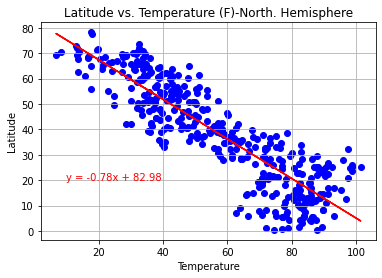

In [51]:
plt.scatter(north_hemi['Temperature'], north_hemi['Latitude'], marker='o', color= 'blue')
plt.grid()
plt.plot(x1, regress_values, "r-")
plt.annotate(line_eq, (10,20), color='red')
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.title("Latitude vs. Temperature (F)-North. Hemisphere")
plt.savefig("../output_data/temp_v_lat-NH")
plt.show()

In [ ]:
# This graph shows a significant correlation between northern hemisphere latitiude and temperature. As latitude
# decreases, temperature increases. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [56]:
x2= south_hemi["Temperature"]
y2= south_hemi["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

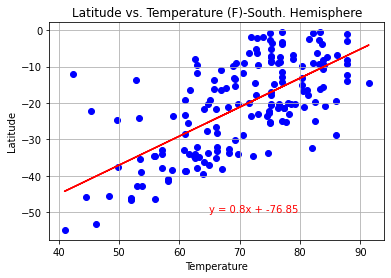

In [59]:
plt.scatter(south_hemi['Temperature'], south_hemi['Latitude'], marker='o', color= 'blue')
plt.grid()
plt.plot(x2, regress_values, "r-")
plt.annotate(line_eq, (65,-50), color='red')
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.title("Latitude vs. Temperature (F)-South. Hemisphere")
plt.savefig("../output_data/temp_v_lat-SH")
plt.show()

In [ ]:
# This graph, although showing a different correlation, is very similar to the previous graph.
# As you travel closer to the equator, temperature increases. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [60]:
x3= north_hemi["Humidity"]
y3= north_hemi["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x3, y3)
regress_values = x3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

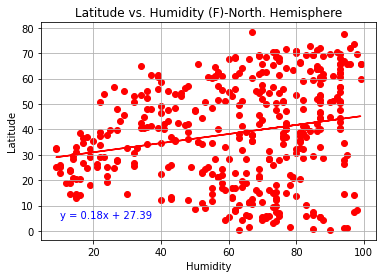

In [63]:
plt.scatter(north_hemi['Humidity'], north_hemi['Latitude'], marker='o', color= 'red')
plt.grid()
plt.plot(x3, regress_values, "r-")
plt.annotate(line_eq, (10,5), color='blue')
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Latitude vs. Humidity (F)-North. Hemisphere")
plt.savefig("../output_data/temp_v_humid-NH")
plt.show()

In [ ]:
# This graph shows a very slight positive correlation between humidity and Northern Hemisphere-latitiude.
# Humidity slightly increases at higher latitudes. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [64]:
x4= south_hemi["Humidity"]
y4= south_hemi["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x4, y4)
regress_values = x4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

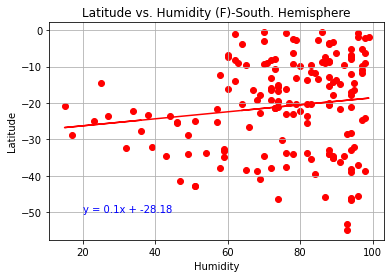

In [66]:
plt.scatter(south_hemi['Humidity'], south_hemi['Latitude'], marker='o', color= 'red')
plt.grid()
plt.plot(x4, regress_values, "r-")
plt.annotate(line_eq, (20,-50), color='blue')
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Latitude vs. Humidity (F)-South. Hemisphere")
plt.savefig("../output_data/humid_v_lat-SH")
plt.show()

In [ ]:
# This graph shows a very slight positive correlation between humidity and the Southern Hemisphere.
# As you travel closer to the equator, humidity drops a little. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [67]:
x5= north_hemi["Cloudiness"]
y5= north_hemi["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x5, y5)
regress_values = x5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

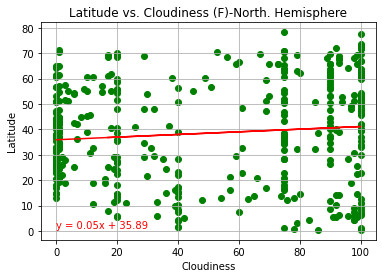

In [70]:
plt.scatter(north_hemi['Cloudiness'], north_hemi['Latitude'], marker='o', color= 'green')
plt.grid()
plt.plot(x5, regress_values, "r-")
plt.annotate(line_eq, (0,1), color='red')
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Latitude vs. Cloudiness (F)-North. Hemisphere")
plt.savefig("../output_data/cloud_v_lat-NH")
plt.show()

In [ ]:
# This graph shows almost no correlation between latitude and cloudiness in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [71]:
x6= south_hemi["Cloudiness"]
y6= south_hemi["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x6, y6)
regress_values = x6 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

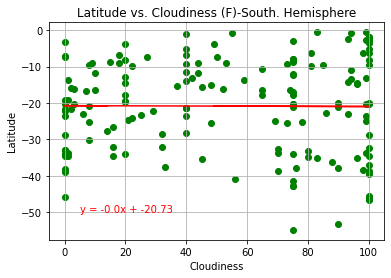

In [74]:
plt.scatter(south_hemi['Cloudiness'], south_hemi['Latitude'], marker='o', color= 'green')
plt.grid()
plt.plot(x6, regress_values, "r-")
plt.annotate(line_eq, (5,-50), color='red')
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Latitude vs. Cloudiness (F)-South. Hemisphere")
plt.savefig("../output_data/cloud_v_lat-SH")
plt.show()

In [ ]:
# This graph shows 0 correlation between latitude and cloudiness in the Southern Hemisphere.
# I wonder if I somehow made a mistake, I thought 0 correlation was statistically impossible. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [75]:
x7= north_hemi["Wind Speed (mph)"]
y7= north_hemi["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x7, y7)
regress_values = x7 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

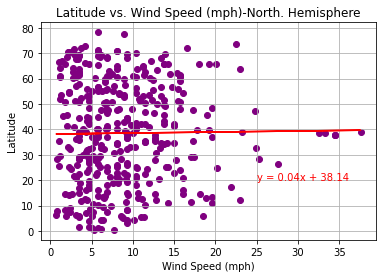

In [77]:
plt.scatter(north_hemi['Wind Speed (mph)'], north_hemi['Latitude'], marker='o', color= 'purple')
plt.grid()
plt.plot(x7, regress_values, "r-")
plt.annotate(line_eq, (25,20), color='red')
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Latitude vs. Wind Speed (mph)-North. Hemisphere")
plt.savefig("../output_data/wind_v_lat-NH")
plt.show()

In [ ]:
# This graph shows a very small positive correlation between higher latitudes in the Northern Hemisphere
# and high wind speeds. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [78]:
x8= south_hemi["Wind Speed (mph)"]
y8= south_hemi["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x8, y8)
regress_values = x8 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

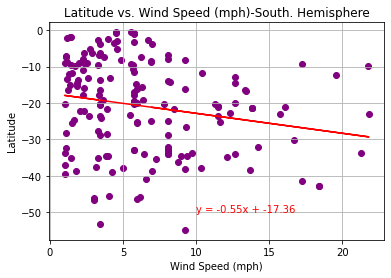

In [80]:
plt.scatter(south_hemi['Wind Speed (mph)'], south_hemi['Latitude'], marker='o', color= 'purple')
plt.grid()
plt.plot(x8, regress_values, "r-")
plt.annotate(line_eq, (10,-50), color='red')
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Latitude vs. Wind Speed (mph)-South. Hemisphere")
plt.savefig("../output_data/wind_v_lat-SH")
plt.show()

In [ ]:
# This graph shows a significant negative correlation between latitude in the Southern Hemisphere and wind speeds. 